# TITANIC - Kaggle

Quem nunca ouviu falar do barco que não afundava, o famoso Titanic! Portanto, hoje vamos trabalhar no caso do Titanic
para analisar os dados e verificar se existe algumas têndencias que aumentam a chance de alguém ter sobrevivido a esta tragédia.

https://www.kaggle.com/heptapod/titanic



# Notas Variáveis

pclass : Uma proxy para status socioeconômico (SES) 
1a = Alta 
2a = Média 
3a = Menor 

idade : A idade é fracionária se menor que 1. Se a idade é estimada, é na forma de xx.5 

sibsp : O conjunto de dados define relações familiares desta forma ... 
Irmão = irmã, irmão, meio-irmão, irmã adotiva 
Esposa = marido, esposa (amantes e noivas foram ignorados) 

parch : O conjunto de dados define as relações familiares desta forma ... 
Pai = mãe, pai 
Criança = filha, filho, enteada, enteado 
Algumas crianças viajavam apenas com uma babá, portanto parch = 0 para elas.

In [242]:
# Carregar as Bibliotecas Numpy, pandas, plotly, matplotlib...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns

#Ver todas as colunas
pd.pandas.set_option('Display.max_columns',None)

In [243]:
#Verificar e Interpretar as variáveis Head, dtypes, describe.

titanic = pd.read_csv('train_and_test2.csv');
titanic.head().T


,0,1,2,3,4
Passengerid,1.00,2.0000,3.000,4.0,5.00
Age,22.00,38.0000,26.000,35.0,35.00
Fare,7.25,71.2833,7.925,53.1,8.05
Sex,0.00,1.0000,1.000,1.0,0.00
sibsp,1.00,1.0000,0.000,1.0,0.00
zero,0.00,0.0000,0.000,0.0,0.00
zero.1,0.00,0.0000,0.000,0.0,0.00
zero.2,0.00,0.0000,0.000,0.0,0.00
zero.3,0.00,0.0000,0.000,0.0,0.00
zero.4,0.00,0.0000,0.000,0.0,0.00


In [244]:
titanic.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [245]:
titanic.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.865560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


# Excluir colunas desnecessárias
Com base na análise acima, todos as colunas que começam com zero estão zeradas, não servem pra nada.
São elas,
('zero', 'zero.1','zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6','zero.7','zero.8', 
'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13','zero.14', 'zero.15', 'zero.16')


In [246]:
#-- criando um dataset novo
titanicAtualizado = titanic.copy()

In [247]:
#-- selecionando as colunas desse novo dataset
titanicAtualizado = titanicAtualizado.drop(columns=['zero', 'zero.1','zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6','zero.7','zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13','zero.14', 'zero.15', 'zero.16','zero.17','zero.18'], axis=1)

In [248]:
#-- pritando o head do novo dataset
titanicAtualizado.head().T

,0,1,2,3,4
Passengerid,1.00,2.0000,3.000,4.0,5.00
Age,22.00,38.0000,26.000,35.0,35.00
Fare,7.25,71.2833,7.925,53.1,8.05
Sex,0.00,1.0000,1.000,1.0,0.00
sibsp,1.00,1.0000,0.000,1.0,0.00
Parch,0.00,0.0000,0.000,0.0,0.00
Pclass,3.00,1.0000,3.000,1.0,3.00
Embarked,2.00,0.0000,2.000,2.0,2.00
2urvived,0.00,1.0000,1.000,1.0,0.00


In [249]:
titanicAtualizado.describe()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.492731,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814626,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


# Valores Nulos, será que existem?
Agora temos que nos preocupar se temos valor nulo no novo data set, já que eliminamos as colunas desnecessárias criando uma nova cópia do data set.

In [250]:
titanicAtualizado.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64

In [251]:
titanicAtualizado.shape

(1309, 9)

In [252]:
# Temos 2 pessoas que não sabemos o local de embarque, como são 2 entre 1309 vamos manter estes dados
titanicAtualizado[titanicAtualizado['Embarked'].isnull()]

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
61,62,38.0,80.0,1,0,0,1,NaN,1
829,830,62.0,80.0,1,0,0,1,NaN,1


In [253]:
# Mudando os nomes das colunas para facilitar a identificação
titanicAtualizado.columns = ['Id_Passageiro','Idade','ValorPassagem','Sexo','NumIrmaoConjuge','NumPaiFilhos','Classe','Embarque','Sobrevivente']
titanicAtualizado.head()


,Id_Passageiro,Idade,ValorPassagem,Sexo,NumIrmaoConjuge,NumPaiFilhos,Classe,Embarque,Sobrevivente
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


# Vamos começar a fazer a Análise Exploratória 

In [255]:
colunas = ['Sexo','Classe','Embarque']
contagemTotal = len(titanicAtualizado)


titanicAtualizado["Sexo"] = titanicAtualizado["Sexo"].replace([0,1],["Masculino","Feminino"])
titanicAtualizado["Sobrevivente"] = titanicAtualizado["Sobrevivente"].replace([0,1],["Não","Sim"])
titanicAtualizado["Embarque"] = titanicAtualizado["Embarque"].replace([0,1,2],["Cherbourg","Queenstown","Southampton"])




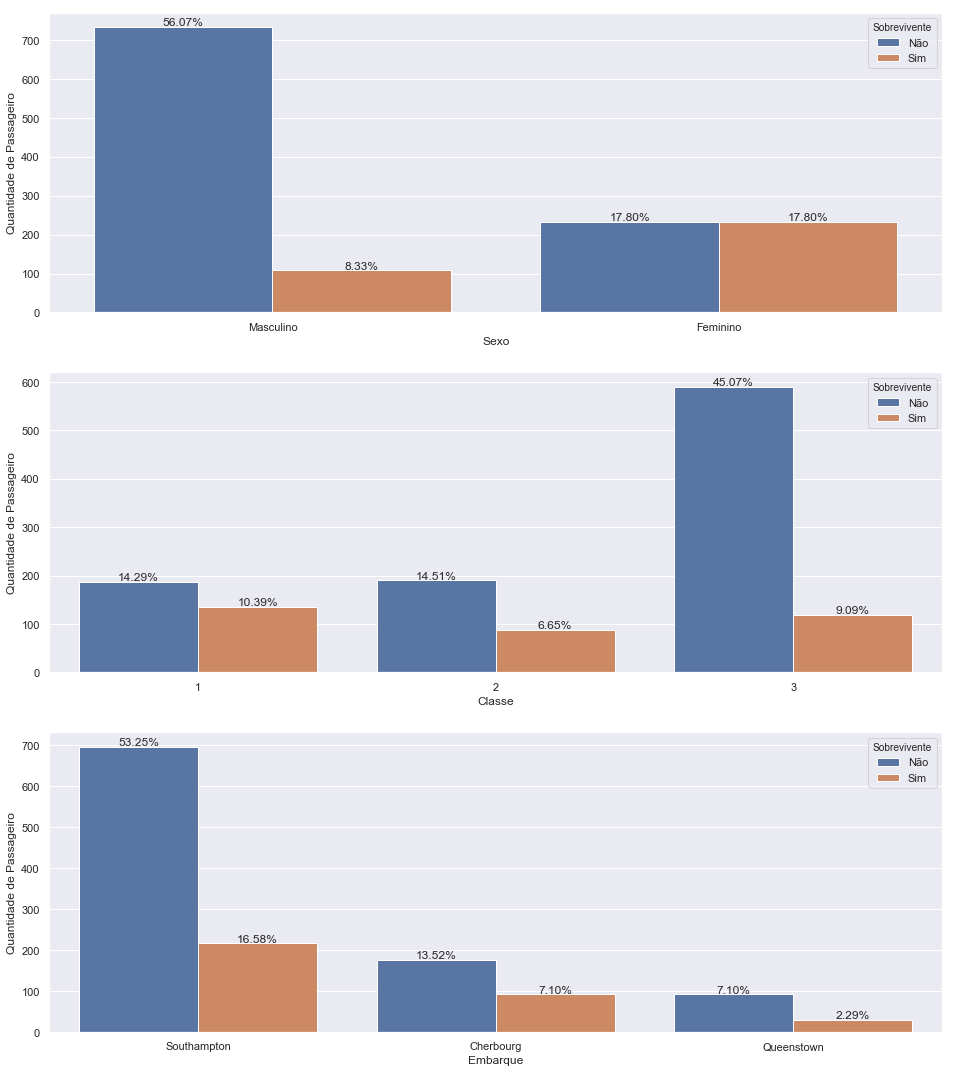

In [256]:
plt.figure(figsize=(16,32))
a = 0
sns.set(style="darkgrid")

for i in colunas:
    a+=1
    plt.subplot(5,1,a)
    ax1 = sns.countplot(data=titanicAtualizado,x=i,hue="Sobrevivente")
    for b in ax1.patches:
        altura = b.get_height()
        ax1.set_ylabel('Quantidade de Passageiro')
        ax1.text(b.get_x()+b.get_width()/2.,
                 altura + 3,
                 '{:1.2f}%'.format((altura/contagemTotal) * 100,0 ),
                 ha="center",rotation=0)

# Vamos as informações obtidas com estes gráficos

# SEXO - (Feminino) - tem mais chances de Sobreviver

Entre os homens, a cada 7.73 homens apenas 1 sobreviveu.

Já entre as mulheres o porcentual de sobrevivência foi bem maior, 1 em cada 2 sobreviveu.

# Classe - Quanto maior a classe do passageiro maior a porcentagem de sobrevivência

Entre os passageiros da 1(primeira) classe, 1 a cada 2.37 sobreviveu.

Entre os passageiros da 2(segunda) classe, 1 a cada 3.18 sobreviveu.

Entre os passageiros da 3(terceira) classe, 1 a cada 5.96 sobreviveu.

# Embarque - Os passageiros que embarcaram em Cherbourg têm mais chances de Sobreviver 

Entre os passageiros que embarcaram em Cherbourg, 1 a cada 2.9 sobreviveu.

Entre os passageiros que embarcaram em Queenstown, 1 a cada 4.10 sobreviveu.

Entre os passageiros que embarcaram em Southampton, 1 a cada 4.21 sobreviveu.




# Agora Vamos focar na Idade, Será que alguma faixa etária tem mais chances de sobrevivência? 

Vou considerar que crianças seriam de 0 a 12 anos, jovens de 13 a 18 anos, 19 a 59 anos adultos e acima de 60 idosos.

In [257]:
# Criando a categoria por idade
titanicAtualizado['Categoria_idade'] = titanicAtualizado['Idade'][:].apply(lambda x: "Criança" if x < 13 else "Jovem" if x >13 and x<19 else "Adulto" if x >18 and x <60 else "Idoso")

In [258]:
titanicAtualizado['Categoria_idade'].value_counts()

Adulto     1073
Jovem        97
Criança      94
Idoso        45
Name: Categoria_idade, dtype: int64

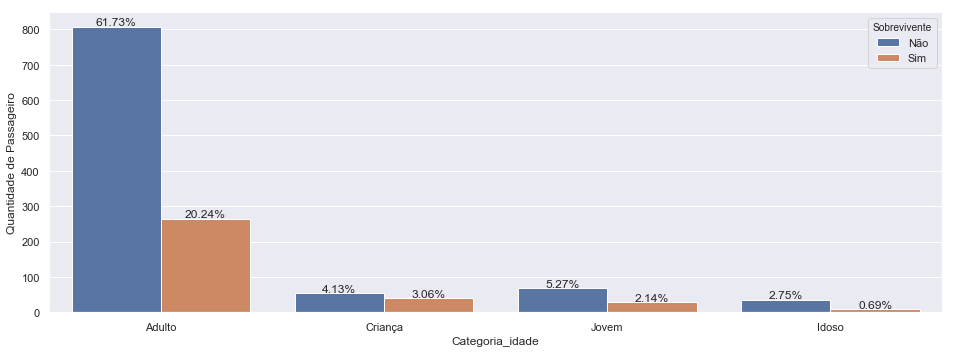

In [259]:
plt.figure(figsize=(16,32))
a = 0
sns.set(style="darkgrid")

colunas = ['Categoria_idade']

for i in colunas:
    a+=1
    plt.subplot(5,1,a)
    ax1 = sns.countplot(data=titanicAtualizado,x=i,hue="Sobrevivente")
    for b in ax1.patches:
        altura = b.get_height()
        ax1.set_ylabel('Quantidade de Passageiro')
        ax1.text(b.get_x()+b.get_width()/2.,
                 altura + 3,
                 '{:1.2f}%'.format((altura/contagemTotal) * 100,0 ),
                 ha="center",rotation=0)
   

# Idade - "As crianças" são os quem têm o maior porcentual de sobrevivência entre as categorias por idade, foi vericado também que quanto maior a faixa de idade menor é a taxa de sobrevivência.

Entre as crianças, 1 a cada 2.34 sobreviveu

Entre os jovens, 1 cada 3.46 sobreviveu

Entre os adultos, 1 a cada 4.05 sobreviveu

Entre os idosos, 1 a cada 4.99 sobreviveu


# NumIrmaoConjuge - ter ou não irmão ou Conjuge não afeta na taxa de sobrevivência.

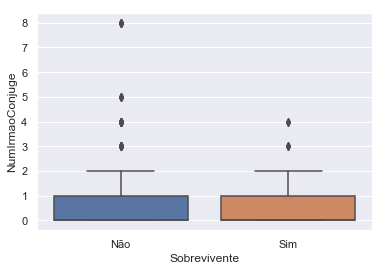

In [262]:
sns.boxplot(x= titanicAtualizado['Sobrevivente'], y =titanicAtualizado['NumIrmaoConjuge'])

# NumPaiFilhos - Quem é pai ou filho tem grandes chances de sobrevivência

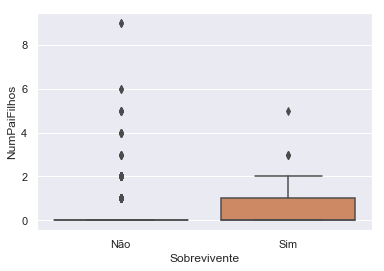

In [263]:
sns.boxplot(x= titanicAtualizado['Sobrevivente'], y =titanicAtualizado['NumPaiFilhos'])